<a href="https://colab.research.google.com/github/brngl/dimensionality-reduction-comparision/blob/master/Dimensionality_reduction_on_TF_Datasets_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Different dimensional reduction algorithms are compared.


### Comparision are made performing various algorithms on **Malaria** dataset.
---
###**WARNING:** 
#####Some of the plots are not shown in jupyter notebook. Please click on  [this link](https://nbviewer.jupyter.org/github/brngl/dimensionality-reduction-comparision/blob/master/Dimensionality_reduction_on_TF_Datasets.ipynb) to view the full notebook on nbviewer.

##### You can also click on the right up corner "Limited rendering only, external view available with nbviewer".
---

### Download and prepare Dataset


---


*MNIST dataset*




In [0]:
#!pip install tensorflow==2.0.0

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [0]:
ds = tfds.builder('mnist')

In [4]:
print(ds.info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [0]:
ds.download_and_prepare()

In [0]:
datasets = ds.as_dataset()

In [7]:
type(ds)

tensorflow_datasets.image.mnist.MNIST

In [8]:
type(datasets)

dict

In [0]:
train_dataset = datasets['test']

In [10]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

### Show examples

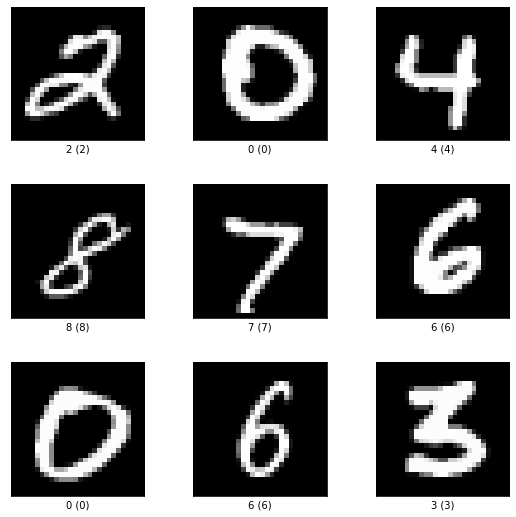

In [11]:
fig = tfds.show_examples(ds.info, train_dataset)

### Convert dataset into a Numpy array and resize images to 64x64

In [0]:
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

images = list()
labels = list()
for example in tfds.as_numpy(train_dataset):
    image, label = example['image'], example['label']
    image_resized = resize(image, (64, 64), anti_aliasing=True)
    images.append(image_resized)
    labels.append(label)
h = images[0].shape[0]
w = images[0].shape[1]
c = images[0].shape[2]


imgs = np.array(np.empty([len(images), h, w, c]))
labels = np.array(labels)
for i in range(len(images)):
    imgs[i] = images[i]

In [13]:
imgs.shape

(10000, 64, 64, 1)

In [14]:
type(tfds.as_numpy(train_dataset))

generator

### Show resized samples

2


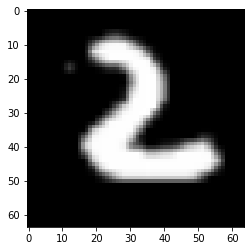

In [25]:
from matplotlib import pyplot as plt

index = 200
plt.imshow(imgs[index, ..., 0], cmap=plt.cm.gray)
print(labels[index])

### Create training and test set

In [0]:
X_test = imgs
y_test = labels

### Compare dimensionality reduction algorithms

In [0]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from sklearn.decomposition import PCA, KernelPCA

In [0]:
save = {
    'TSNE' : 'TSNE-embed-malaria-test',
    'PCA' : 'PCA-embed-malaria-test',
    'KPCA Linear' : 'KPCA-linear-embed-malaria-test',
    'KPCA Poly' : 'KPCA-poly-embed-malaria-test',
    'LLE' : 'LLE-embed-malaria-test',
    'LLE10' : 'LLE10-embed-malaria-test',
}

In [0]:
load = {
    'TSNE' : False,
    'PCA' : False,
    'KPCA Linear' : False,
    'KPCA Poly' : False,
    'LLE' : False,
    'LLE10' : False,
}

In [35]:
X_test.shape

(10000, 64, 64, 1)

In [0]:
tsne_embed = None
if load['TSNE']:
    tsne_embed = np.load(save['TSNE']+'.npz')['embed']
else:
    tsne = TSNE(n_components=2)
    X_test_reshaped = X_test.reshape([X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]])
    tsne_embed = tsne.fit_transform(X_test_reshaped)

In [0]:
pca_embed = None
if load['PCA']:
    pca_embed = np.load(save['PCA']+'.npz')['embed']    
else:
    pca = PCA(n_components=2)
    X_test_reshaped = X_test.reshape([X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]])
    pca_embed = pca.fit_transform(X_test_reshaped)

In [0]:
kpca_linear_embed = None
if load['KPCA Linear']:
    kpca_linear_embed = np.load(save['KPCA Linear']+'.npz')['embed']    
else:
    kpca_linear = KernelPCA(n_components=2, kernel='linear')
    X_test_reshaped = X_test.reshape([X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]])
    kpca_linear_embed = kpca_linear.fit_transform(X_test_reshaped)

In [0]:
kpca_poly_embed = None
if load['KPCA Poly']:
    kpca_poly_embed = np.load(save['KPCA Poly']+'.npz')['embed']    
else:
    kpca_poly = KernelPCA(n_components=2, kernel='poly')
    X_test_reshaped = X_test.reshape([X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]])
    kpca_poly_embed = kpca_poly.fit_transform(X_test_reshaped)

In [0]:
lle_embed = None
if load['LLE']:
    lle_embed = np.load(save['LLE']+'.npz')['embed']
else:
    lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5)
    X_test_reshaped = X_test.reshape([X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]])
    lle_embed = lle.fit_transform(X_test_reshaped)

In [0]:
lle10_embed = None
if load['LLE10']:
    lle10_embed = np.load(save['LLE10']+'.npz')['embed']
else:
    lle10 = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
    X_test_reshaped = X_test.reshape([X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]])
    lle10_embed = lle10.fit_transform(X_test_reshaped)

### Save embeddings

In [0]:
np.savez(save['TSNE'], embed=tsne_embed,)
np.savez(save['PCA'], embed=pca_embed,)
np.savez(save['KPCA Linear'], embed=kpca_linear_embed,)
np.savez(save['KPCA Poly'], embed=kpca_poly_embed,)
np.savez(save['LLE'], embed=lle_embed,)
np.savez(save['LLE10'], embed=lle10_embed,)

In [0]:
from bokeh.io import output_notebook
from bokeh.resources import CDN, INLINE
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.transform import factor_cmap, factor_mark
from bokeh.plotting import ColumnDataSource
from bokeh.layouts import gridplot
import numpy as np
output_notebook(CDN)

### Plot single embedding

In [0]:
def plot_embed(embed, X, labels, n_classes, class_colors, title):
    color_array = np.empty(shape=X.shape[0], dtype='|S10')
    legend_array = np.empty(shape=X.shape[0], dtype=np.str_)
    colors = [x for x in class_colors.split('-')]
    colors_map = labels.astype('uint8')

    for cl in range(n_classes):
        indices = np.where(colors_map==cl)[0]
        color_array[indices] = colors[cl]
        legend_array[indices] = cl
    colors_map = colors_map.astype('uint8')
    source = ColumnDataSource(data=dict(
        x_vals = embed[:, 0],
        y_vals = embed[:, 1],
    #     color = color_array,
        legend = legend_array,
    ))
    output_notebook(CDN)

    TOOLTIPS = [
        ("index", "$index"),
        ("(x,y)", "($x, $y)"),
        ("number", "@legend"),
    ]

    NUMBERS = np.unique(legend_array)

    p = figure(title = title, plot_width=900, plot_height=900, tooltips=TOOLTIPS)
    p.circle('x_vals', 'y_vals', size=7, alpha=0.4, 
            legend='legend', 
            color=factor_cmap('legend', 'Category10_10', NUMBERS), 
            source=source)

    # show the results
    p.legend.location = 'top_left'
    show(p)


### Plot all embeddings in a grid view

In [0]:
import math
def grid_plot_embed(embeddings, X, labels, n_classes, dim_plots, class_colors, titles, n_subplots=2):
    plots = list()
    for i in range(len(embeddings)):
        embed = embeddings[i]
        color_array = np.empty(shape=X.shape[0], dtype='|S10')
        legend_array = np.empty(shape=X.shape[0], dtype=np.str_)
        colors = [x for x in class_colors.split('-')]
        colors_map = labels.astype('uint8')

        for cl in range(n_classes):
            indices = np.where(colors_map==cl)[0]
            color_array[indices] = colors[cl]
            legend_array[indices] = cl
        colors_map = colors_map.astype('uint8')
        source = ColumnDataSource(data=dict(
            x_vals = embed[:, 0],
            y_vals = embed[:, 1],
        #     color = color_array,
            legend = legend_array,
        ))
        output_notebook(CDN)

        TOOLTIPS = [
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("number", "@legend"),
        ]

        NUMBERS = np.unique(legend_array)
        p = figure(title = titles[i], plot_width=dim_plots[0], plot_height=dim_plots[1], tooltips=TOOLTIPS)
        p.circle('x_vals', 'y_vals', size=7, alpha=0.4, 
            legend='legend', 
            color=factor_cmap('legend', 'Category10_10', NUMBERS), 
            source=source)
        # show the results
        p.legend.location = 'bottom_right'
        plots.append(p)
    
    grid_cols = n_subplots
    grid_rows = math.ceil(len(plots)/n_subplots)
    grid = np.full((grid_rows*grid_cols), None)
    for i in range(len(plots)):
        grid[i] = plots[i]
    
    grid = grid.reshape((grid_rows, grid_cols)).tolist()        

    grid_plot = gridplot(grid)
    show(grid_plot)
    


### Plots

In [0]:
colors = 'red-blue-green-yellow-teal-pink-black-gray-lime-brown'
num_classes = 10

In [81]:
grid_plot_embed([
                 tsne_embed,
                 pca_embed,
                 kpca_linear_embed,
                 kpca_poly_embed,
                 lle_embed,
                 lle10_embed,
], 
X_test, y_test, n_classes=num_classes, class_colors=colors, dim_plots = (600,600), titles='TSNE-PCA-Linear Kernel PCA-Poly Kernel PCA-LLE 5 neighbors-LLE 10 neighbors'.split('-'))

In [82]:
plot_embed(tsne_embed, X_test, y_test, n_classes=num_classes, class_colors=colors, title='TSNE')

In [83]:
plot_embed(pca_embed, X_test, y_test, n_classes=num_classes, class_colors=colors, title='PCA')

In [84]:
plot_embed(kpca_linear_embed, X_test, y_test, n_classes=num_classes, class_colors=colors, title='Linear Kernel PCA')

In [85]:
plot_embed(kpca_poly_embed, X_test, y_test, n_classes=num_classes, class_colors=colors, title='Poly Kernel PCA')

In [86]:
plot_embed(lle_embed, X_test, y_test, n_classes=num_classes, class_colors=colors, title='LLE 5 neighbours')

In [87]:
plot_embed(lle10_embed, X_test, y_test, n_classes=num_classes, class_colors=colors, title='LLE 10 neighbours')

3


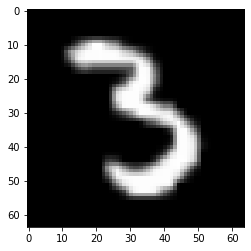

In [88]:
u = 6043
plt.imshow(imgs[u, ...,0], cmap=plt.cm.gray)
print(y_train[u])

3


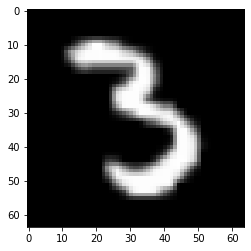

In [89]:
u = 6043
plt.imshow(imgs[u, ...,0], cmap=plt.cm.gray)
print(y_train[u])